# TEST FONCTION POUR LE CHEMIN

In [150]:
import numpy as np
from scipy import signal
from scipy import interpolate
from PIL import Image
import matplotlib.pyplot as plt
import numpy.linalg as npl
import os
from scipy.misc import imresize
from sklearn.neighbors import KNeighborsClassifier as Knc
from sklearn.cross_validation import train_test_split
from keras import models
from keras import layers
from keras.utils import to_categorical

In [32]:
liste_noms = os.listdir("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery")
liste_chemins=[]
for name in liste_noms:
    if name[-4:] == '.jpg':
        print(name)
        liste_chemins+=["/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/"+name]
        plt.imshow(plt.imread(liste_chemins[-1]))
        plt.show()
    else:
        pass
    

In [113]:
def Contenu_Dossier(path_dossier):
    
    path=path_dossier

    liste_noms = os.listdir(path_dossier)
    liste_chemins=[]
    for name in liste_noms:
        if name[-4]!='.':
            liste_chemins2=Contenu_Dossier(path_dossier+'/'+name)
            liste_chemins+=liste_chemins2
        if name[-4:] == '.jpg':
            liste_chemins+=[path_dossier+"/"+name]
        else:
            pass
        
    return liste_chemins
    

['/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_192.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_099.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_111.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_018.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_035.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_147.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_052.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_164.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_181.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_088.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_100.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_007.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_119.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_0

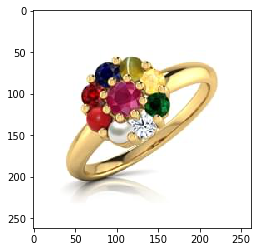

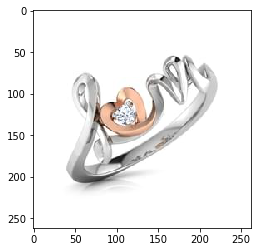

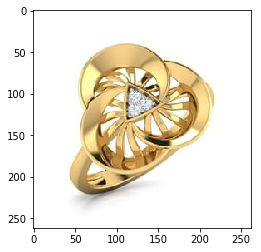

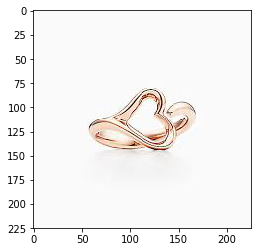

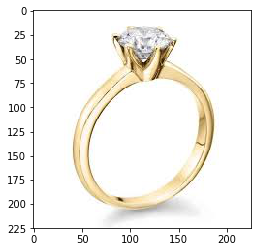

In [114]:
l_chemins = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery")

print(l_chemins)
for i in range(5):
    plt.imshow(plt.imread(l_chemins[i]))
    plt.show()


In [115]:
import scipy
tab=scipy.misc.imread(l_chemins[0])


/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [116]:
type(tab)

numpy.ndarray

In [117]:
tab.shape

(262, 262, 3)

In [118]:
262*262*3

205932

In [119]:
tab.max()

255

In [120]:
len(l_chemins)

1270

# KNN with mnist

In [121]:
from sklearn import datasets
mnist = datasets.load_digits()

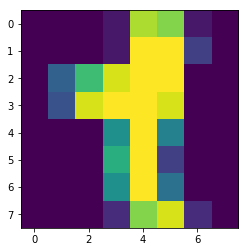

In [122]:
plt.imshow(mnist['images'][80])

In [123]:
knn=Knc()

In [124]:
from sklearn.cross_validation import train_test_split

In [125]:
X=mnist['data']
y=mnist['target']

In [126]:
X_train, X_test, y_train, y_test= train_test_split(X,y)
print(X_train)

[[ 0.  0.  0. ...  6.  0.  0.]
 [ 0.  0. 10. ...  8.  0.  0.]
 [ 0.  0. 11. ...  0.  0.  0.]
 ...
 [ 0.  0. 11. ...  0.  0.  0.]
 [ 0.  0.  7. ...  5.  0.  0.]
 [ 0.  2.  6. ... 14.  1.  0.]]


In [127]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [128]:
knn.score(X_test, y_test)

0.9844444444444445

In [129]:
knn.kneighbors([X[80]])

(array([[ 0.        , 19.4422221 , 20.63976744, 20.63976744, 22.93468988]]),
 array([[1148, 1079,  527,  481,  364]]))

TypeError: Invalid dimensions for image data

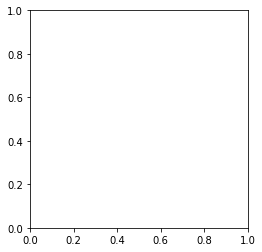

In [130]:
plt.imshow(mnist['images'])

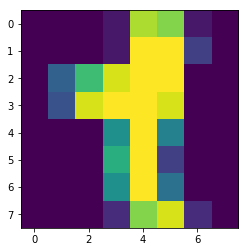

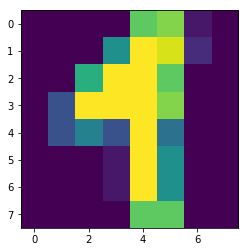

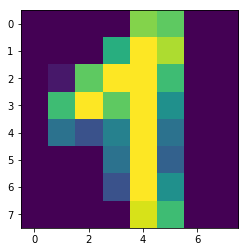

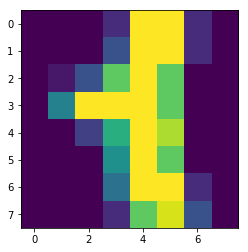

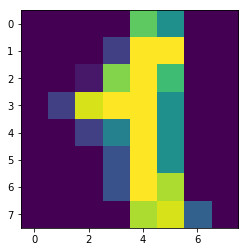

In [23]:
for i in knn.kneighbors([X[80]])[1][0]:
    plt.figure()
    plt.imshow(np.reshape(X_train[i], (8,8)))

## Application au jeu de données

In [131]:
l_chemins_bagues = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring")
l_chemins_bijoux = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery")
l_chemins_bracelets = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/bracelet")

In [132]:
print(np.ravel(plt.imread(l_chemins_bagues[0])))
print(type(np.ravel(plt.imread(l_chemins_bagues[0]))))

[255 255 255 ... 255 255 255]
<class 'numpy.ndarray'>


In [133]:
donnees=[]
cible=[]

for i in range(len(l_chemins_bracelets)) :
    #print((plt.imread(l_chemins_bracelets[i])).shape)
    donnees.append(np.ravel(plt.imread(l_chemins_bracelets[i])))
    cible+=[0]

for i in range(len(l_chemins_bagues)) :
    
    donnees.append(np.ravel(imresize((plt.imread(l_chemins_bagues[i])), (262,262,3))))
    cible+=[0]
    
    
#print('données',donnees)
    
bijoux={'data': donnees, 'target':cible}

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


In [140]:
bijoux2=[]


for i in range(len(l_chemins_bijoux)) :
    bijoux2.append(np.ravel(imresize((plt.imread(l_chemins_bijoux[i])), (262,262,3))))

cible2=np.zeros(len(bijoux2))
bijoux3={'data': bijoux2, 'target':cible2}

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [66]:
print(bijoux['data'])

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255

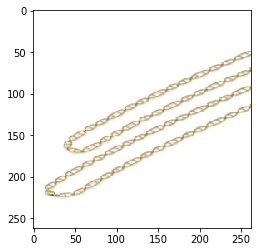

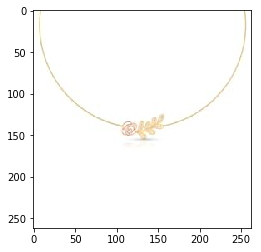

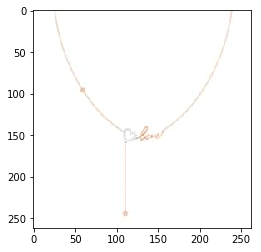

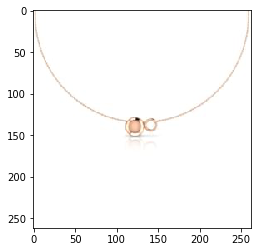

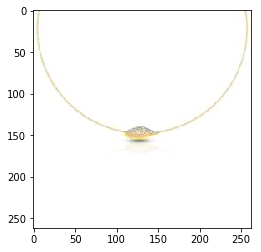

In [147]:
knn_bijoux2=Knc()
X=np.array(bijoux3['data'])
y=bijoux3['target']
X_train, X_test, y_train, y_test= train_test_split(np.array(X),np.array(y))
knn_bijoux.fit(X_train, y_train)

k=1201
for i in knn_bijoux.kneighbors([X[k]])[1][0]:
    plt.figure()
    plt.imshow(np.reshape(X_train[i], (262,262,3)))


In [68]:
X=np.array(bijoux['data'])
y=bijoux['target']
print(X)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [69]:
X_train, X_test, y_train, y_test= train_test_split(np.array(X),np.array(y))
type(X_train)

numpy.ndarray

In [70]:

knn_bijoux.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

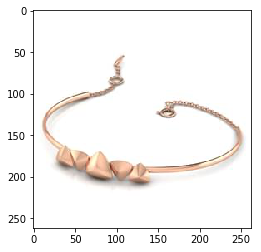

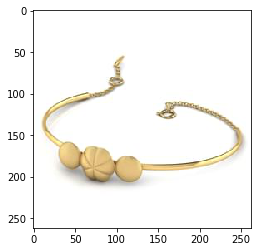

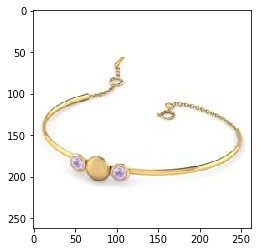

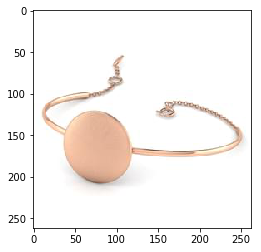

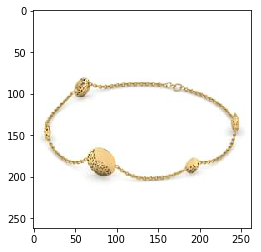

In [72]:
k=100
for i in knn_bijoux.kneighbors([X[k]])[1][0]:
    plt.figure()
    plt.imshow(np.reshape(X_train[i], (262,262,3)))


In [35]:
from scipy.misc import imresize

In [36]:
(plt.imread(l_chemins_bagues[1])).shape

(262, 262, 3)

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


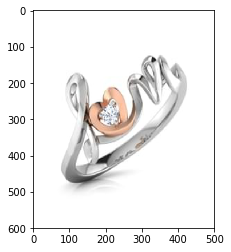

In [45]:
plt.imshow(imresize((plt.imread(l_chemins_bagues[1])), (600,500,3)))

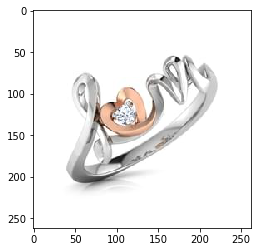

In [40]:
plt.imshow((plt.imread(l_chemins_bagues[1])))

In [41]:
comp = imresize((plt.imread(l_chemins_bagues[1])), (60,60,3))

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


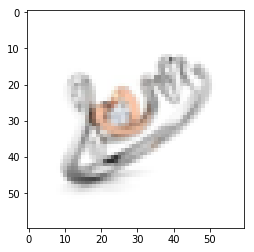

In [42]:
plt.imshow(comp)

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


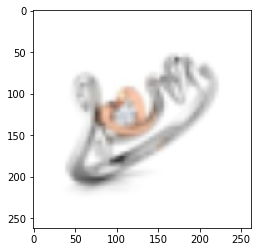

In [43]:
plt.imshow(imresize(comp, (262,262,3)))

# Test réseau de neurones sur mnist

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

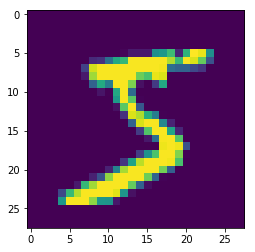

In [5]:
plt.imshow(train_images[0])

In [7]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


In [8]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 47s 786us/step - loss: 0.2584 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.1046 - acc: 0.9682
Epoch 3/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.0694 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.0514 - acc: 0.9845
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0382 - acc: 0.9889


In [17]:
test = np.expand_dims(train_images[0], 0)

In [20]:
probas = network.predict(test)

In [22]:
np.argmax(probas, 1)[0]

5

In [23]:
28*28

784

In [24]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
network.layers[-1].output

<tf.Tensor 'dense_4/Softmax:0' shape=(?, 10) dtype=float32>

In [29]:
from keras.models import Model

# Passage aux bijoux

In [181]:
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(262 * 262 * 3,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
len_bijoux = len(bijoux2)
taille_train = 500

train_bijoux = np.array(bijoux2[:taille_train]).reshape((taille_train, 262 * 262 * 3))
train_bijoux = train_bijoux.astype('float32') / 255

test_bijoux = np.array(bijoux2[taille_train:]).reshape((len_bijoux-taille_train, 262 * 262 * 3))
test_bijoux = test_bijoux.astype('float32') / 255

In [157]:


network.fit(train_bijoux, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0290 - acc: 0.9914
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0220 - acc: 0.9932
Epoch 3/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.0173 - acc: 0.9946
Epoch 4/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.0132 - acc: 0.9964
Epoch 5/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0104 - acc: 0.9971


In [168]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()


In [170]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
    
        horizontal_flip=True)
type(train_datagen)

keras_preprocessing.image.ImageDataGenerator

In [180]:
train_generator = datagen.flow_from_directory(
        "/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery",
        target_size=(262,262,3),
        batch_size=32,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1271 images belonging to 4 classes.
(array([], shape=(0, 262, 262, 3, 3), dtype=float32), array([], dtype=float32))


In [182]:
network2.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)

NameError: name 'validation_generator' is not defined